# Task2 :  Classify Iris Flowers

  

**Background of Task 2: Classify Iris Flowers**

The Iris Flower Classification task involves using machine learning techniques to develop a model that can accurately classify Iris flowers into different species based on their sepal and petal measurements. The Iris dataset contains measurements for three species of Iris flowers: setosa, versicolor, and virginica.

**Approach:**

- **Data Exploration:**
  - Explore the Iris dataset, understand its structure, and gain insights into the distribution of data.
  - Analyze features such as sepal length, sepal width, petal length, and petal width.

- **Data Preprocessing:**
  - Handle missing or inconsistent data for a clean dataset.
  - Check for outliers or anomalies using statistical summaries.

- **Feature Engineering:**
  - Perform feature engineering if needed to extract meaningful information.
  - Understand relationships between different measurements and their impact.

- **Model Selection:**
  - Choose a suitable classification algorithm (e.g., decision trees, SVM, k-nearest neighbors).

- **Model Training:**
  - Split the dataset into training and testing sets.
  - Train the selected model on the training data.

- **Model Evaluation:**
  - Evaluate performance on the testing set using metrics like accuracy, precision, recall, and F1-score.
  - Use confusion matrices and ROC curves for a comprehensive assessment.

**Benefits:**

- **Learning Classification Techniques:**
  - Gain hands-on experience with fundamental classification techniques in machine learning.

- **Understanding Feature Importance:**
  - Learn to identify and leverage important features for accurate predictions.

- **Practical Application:**
  - Apply acquired skills to real-world scenarios where classification is essential.

- **Model Interpretation:**
  - Learn to interpret and communicate model results, understanding feature contributions.

- **Versatility of the Iris Dataset:**
  - The Iris dataset serves as an excellent introduction to classification, adaptable for various machine learning models and techniques.


# Import necessary libraries


In [3]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler,LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


# 1. Data Gathering:


In [4]:
data = pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
## Check the size
data.shape

(150, 6)

In [6]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
## Check basic statistic
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
## Check basic statistic
data.describe(include = "all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [9]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


0

In [10]:
## Check for nan values

data.isna().sum() 


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
data.shape

(150, 6)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Pair Plot:

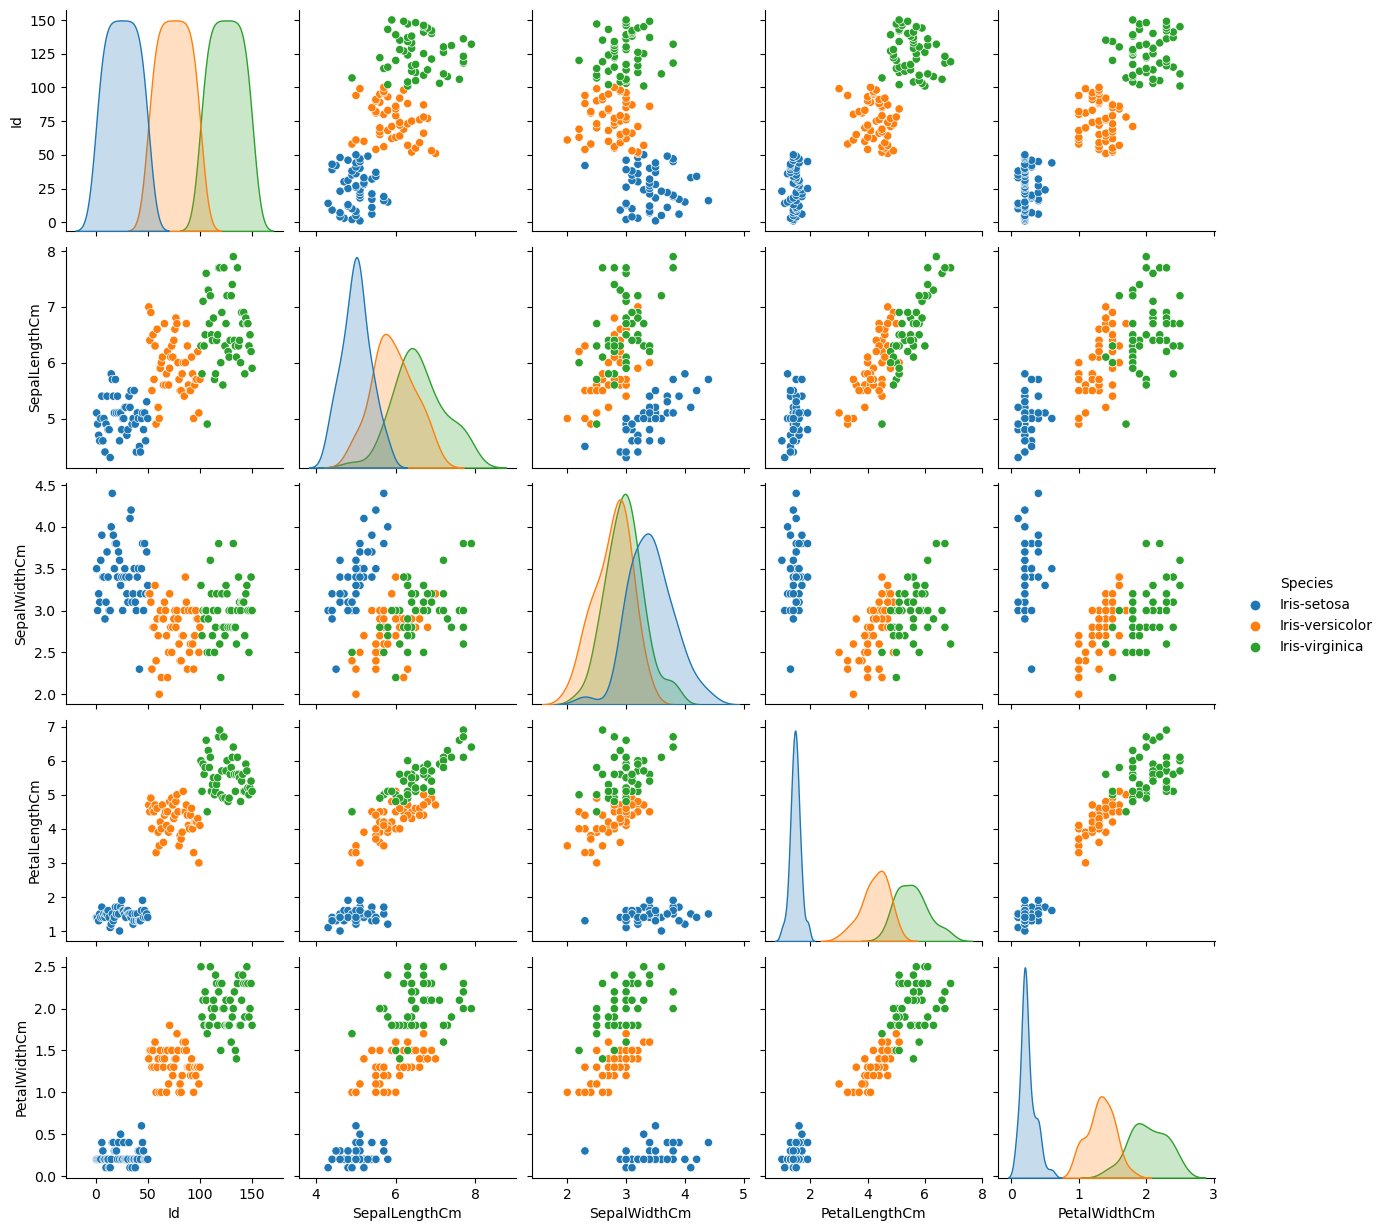

In [16]:
sns.pairplot(data, hue='Species')
plt.show()


## 2. Box Plots:

In [21]:
sns.boxplot(x='Species', y='sepal_length',data)
plt.show()


SyntaxError: positional argument follows keyword argument (2495153225.py, line 1)

## 3.Violin Plots:

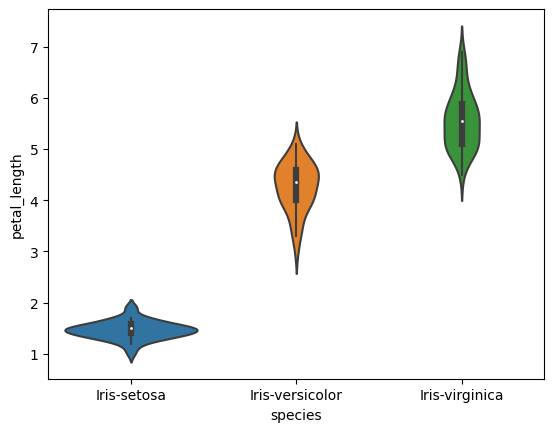

In [14]:
sns.violinplot(x='species', y='petal_length', data=data)
plt.show()


## 4. Scatter Plot:

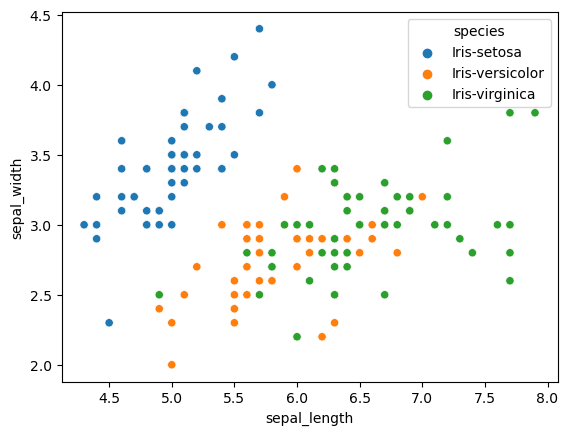

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.show()


## 5. Distribution Plot::

C:\Users\User\AppData\Local\Temp\ipykernel_8508\3454263099.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['species'] == 'Iris-setosa']['petal_length'], label='Iris-setosa', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8508\3454263099.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['species'] == 'Iris-versicolor']['petal_length'], label='Iris-versicolor', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8508\3454263099.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['species'] == 'Iris-virginica']['petal_length'], label='Iris-virginica', shade=True)


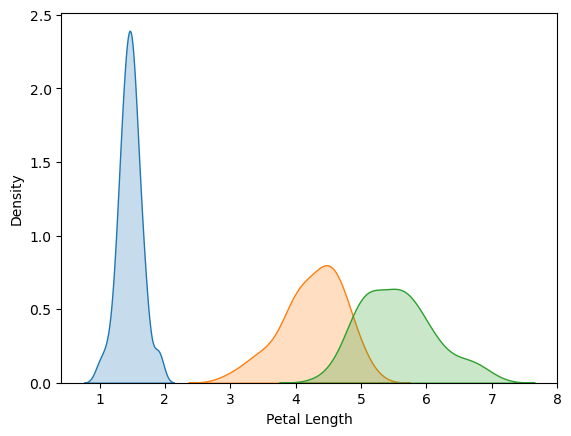

In [16]:
sns.kdeplot(data[data['species'] == 'Iris-setosa']['petal_length'], label='Iris-setosa', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-versicolor']['petal_length'], label='Iris-versicolor', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-virginica']['petal_length'], label='Iris-virginica', shade=True)
plt.xlabel('Petal Length')
plt.ylabel('Density')
plt.show()


## 6. Correlation Heatmap:

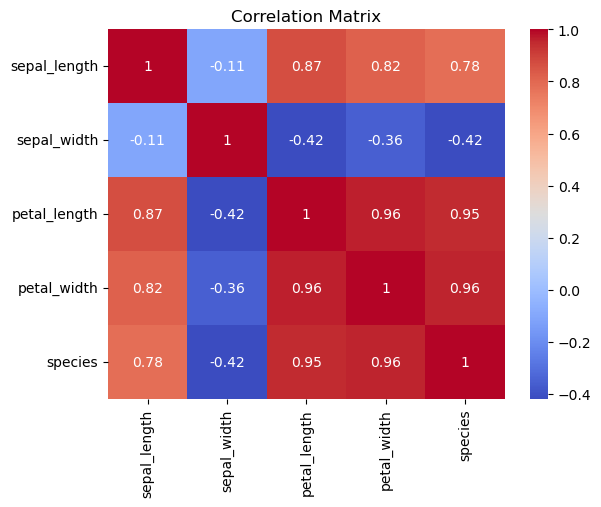

In [25]:
# Create a copy of the dataset
data_encoded = data.copy()

# Encode the 'species' column
label_encoder = LabelEncoder()
data_encoded['species'] = label_encoder.fit_transform(data_encoded['species'])

# Create the correlation matrix and heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




## 7. Bar Plot:

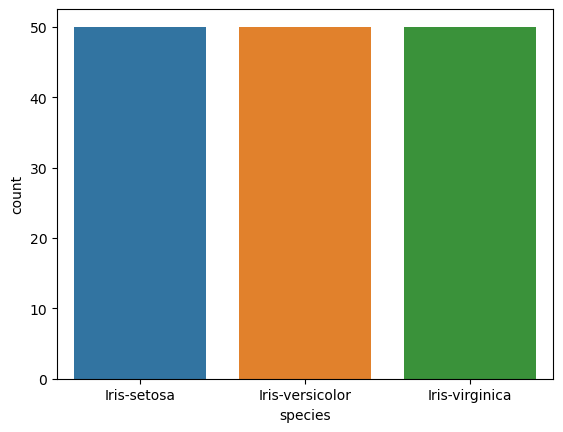

In [18]:
sns.countplot(x='species', data=data)
plt.show()


## 8. Swarm Plot:

E:\Anaconda1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


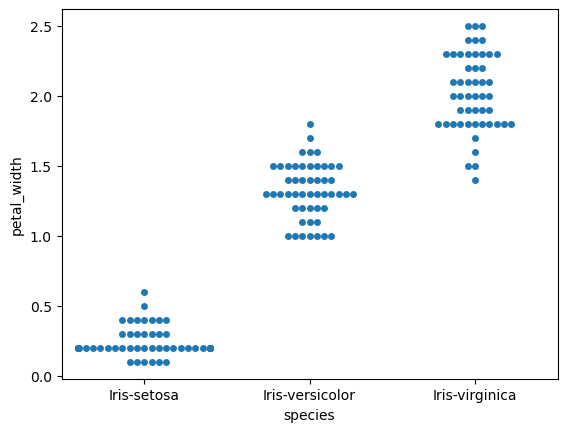

In [19]:
sns.swarmplot(x='species', y='petal_width', data=data)
plt.show()


## 9. Histogram:

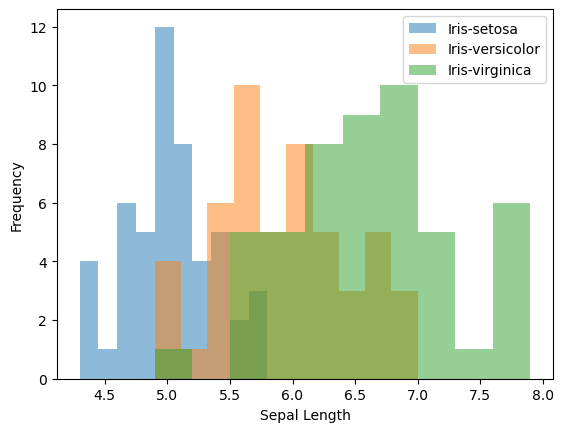

In [20]:
plt.hist(data[data['species'] == 'Iris-setosa']['sepal_length'], alpha=0.5, label='Iris-setosa')
plt.hist(data[data['species'] == 'Iris-versicolor']['sepal_length'], alpha=0.5, label='Iris-versicolor')
plt.hist(data[data['species'] == 'Iris-virginica']['sepal_length'], alpha=0.5, label='Iris-virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 10. Pair Grid:

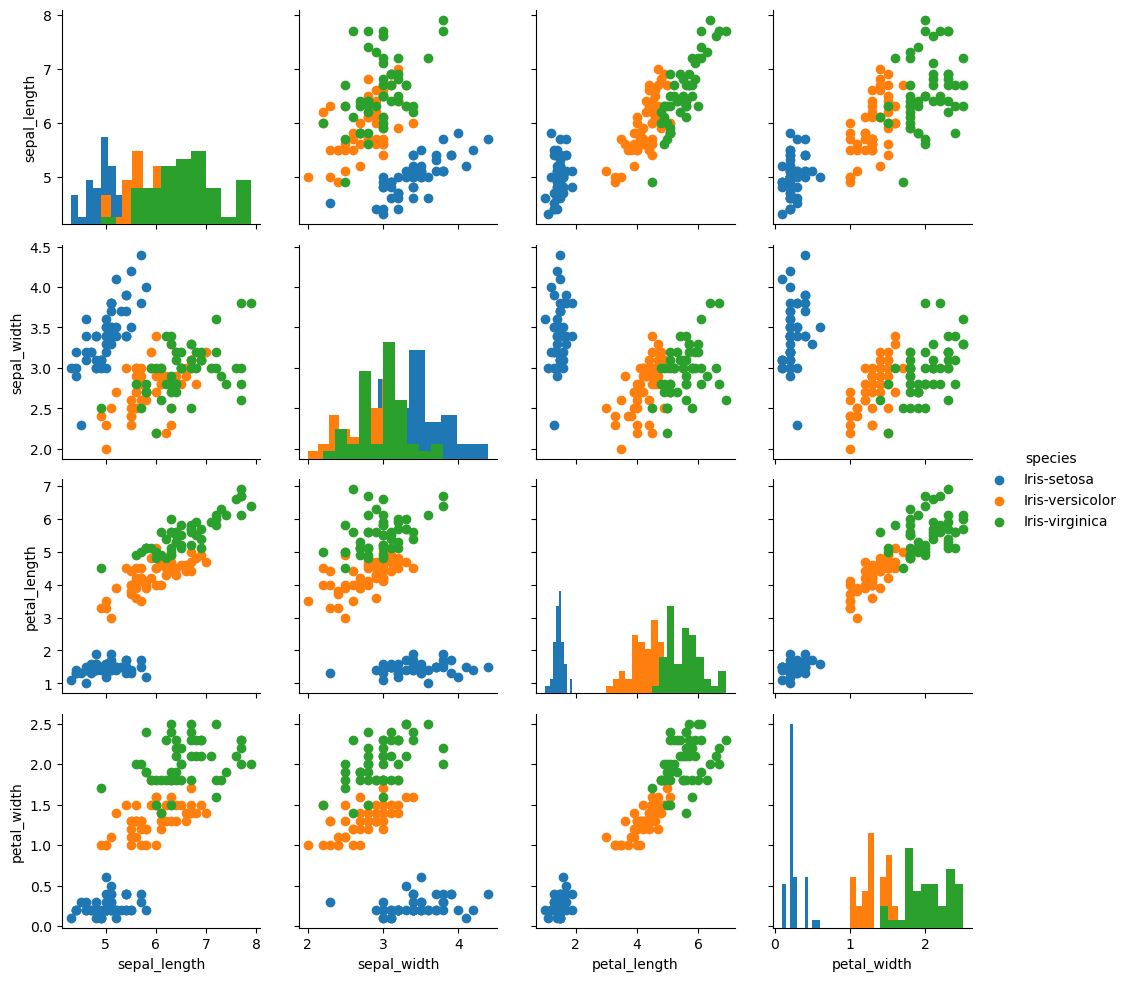

In [21]:
g = sns.PairGrid(data, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()


# 4. Data Preprocessing

In [27]:
scaler = StandardScaler()

numeric = ["sepal_length","sepal_width","petal_length","petal_width"]

transformer = ColumnTransformer([("num",scaler, numeric)])
x = data.drop("species" ,axis = 1)

# Encode the 'species' column
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(data['species'])

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (150, 4)
y shape : (150,)


In [32]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [33]:
x_train.shape

(120, 4)

In [34]:
x_test.shape

(30, 4)

In [35]:
y_train.shape

(120,)

In [36]:
y_test.shape

(30,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

In [38]:
class_names = [0, 1,2]
print(class_names)


[0, 1, 2]


In [39]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### GradientBoostingClassifier

In [40]:

mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 1.00
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



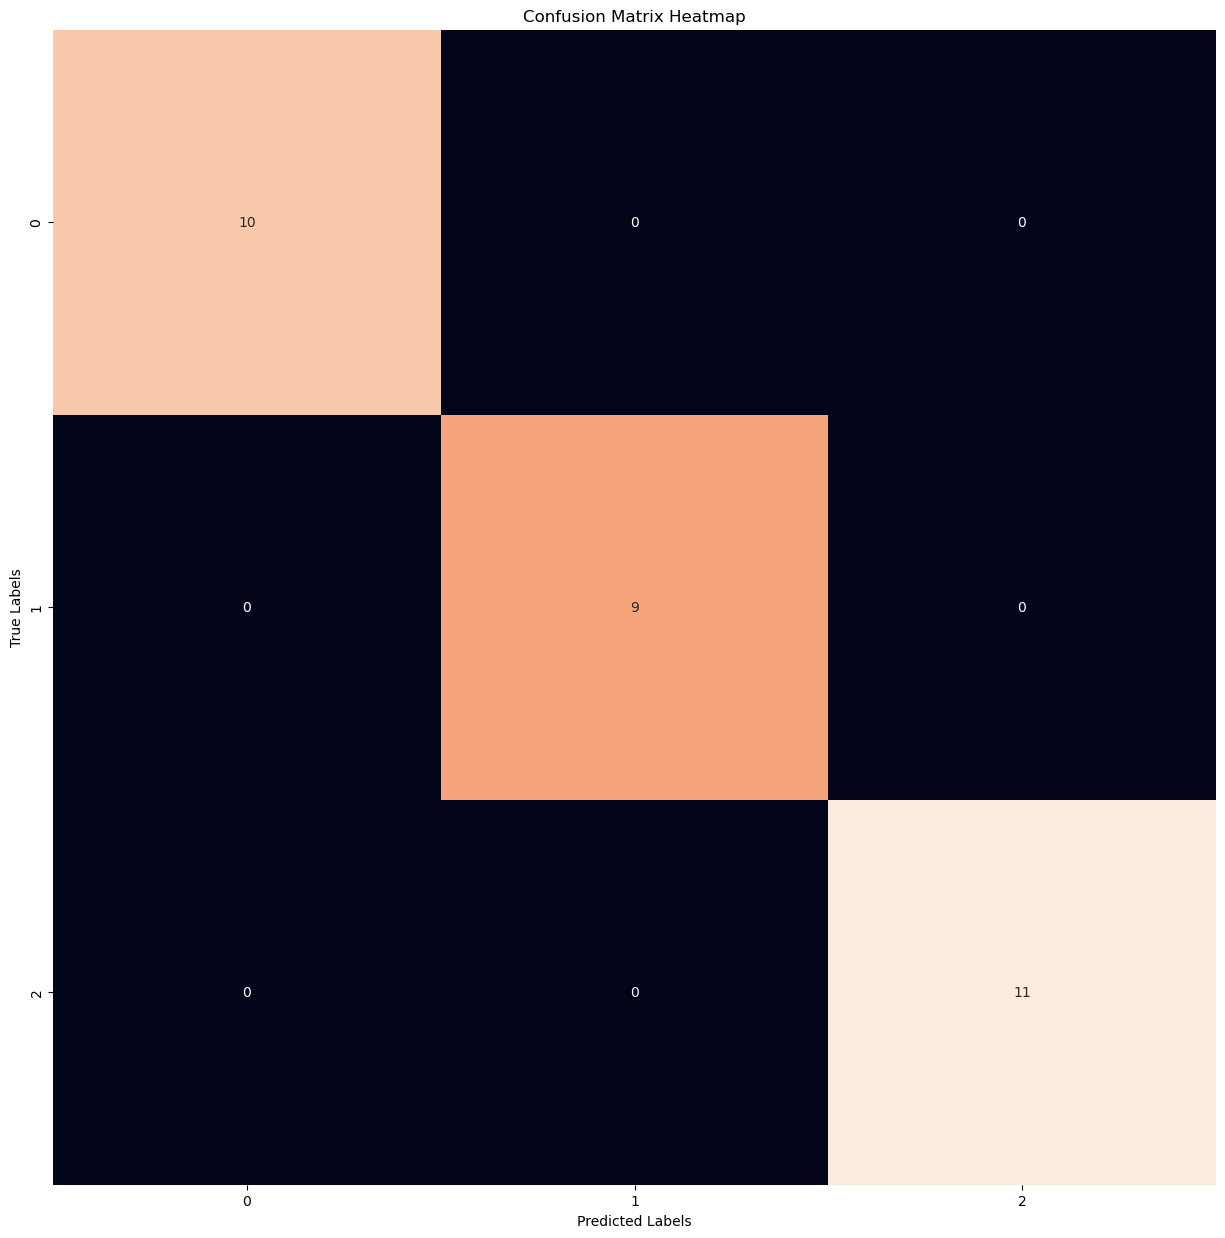

In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### LogisticRegression

In [42]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 0.9666666666666667
Model Score on Testing data 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



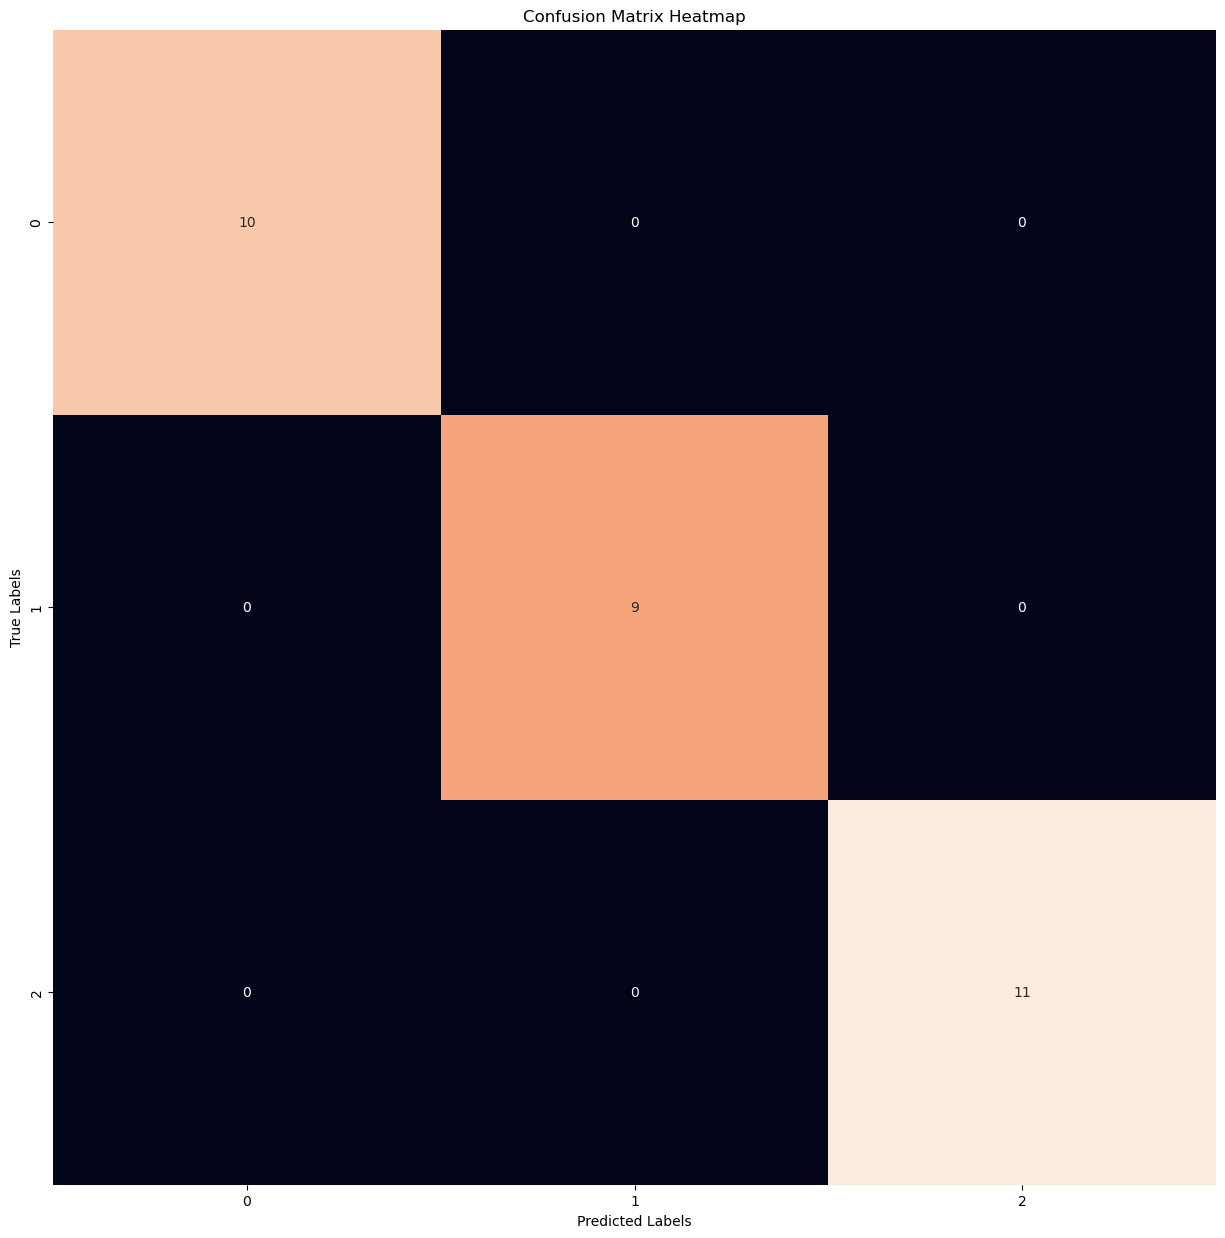

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Support Vector Machine ( SVC )

In [44]:


svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 0.95
Model Score on Testing data 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



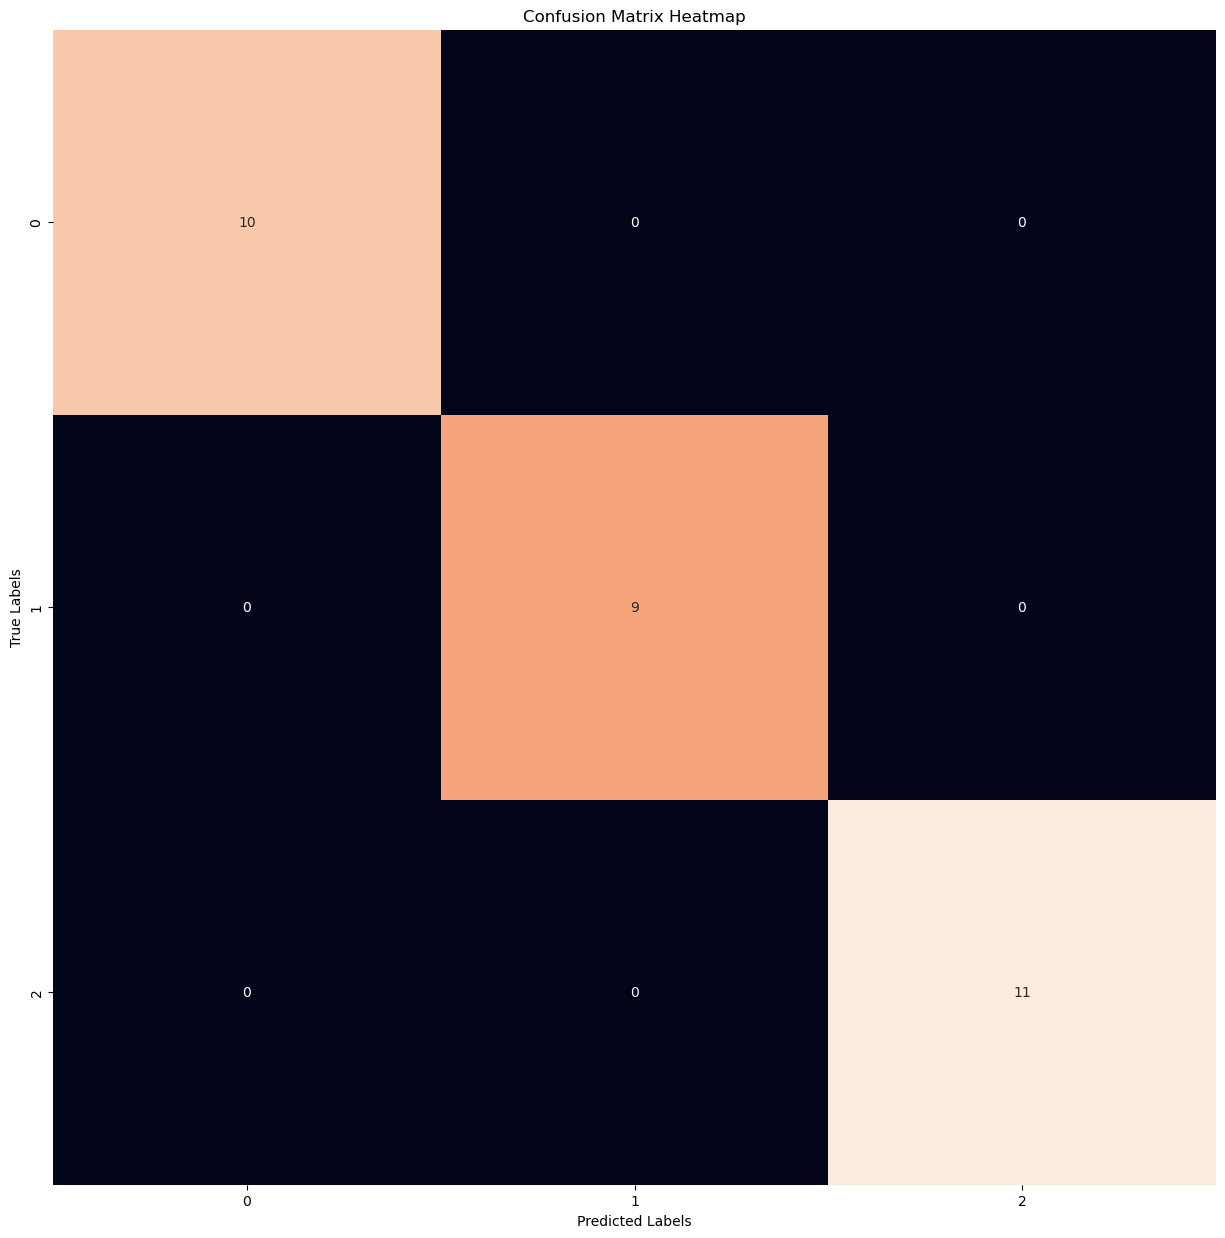

In [45]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### RandomForestClassifier

In [48]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



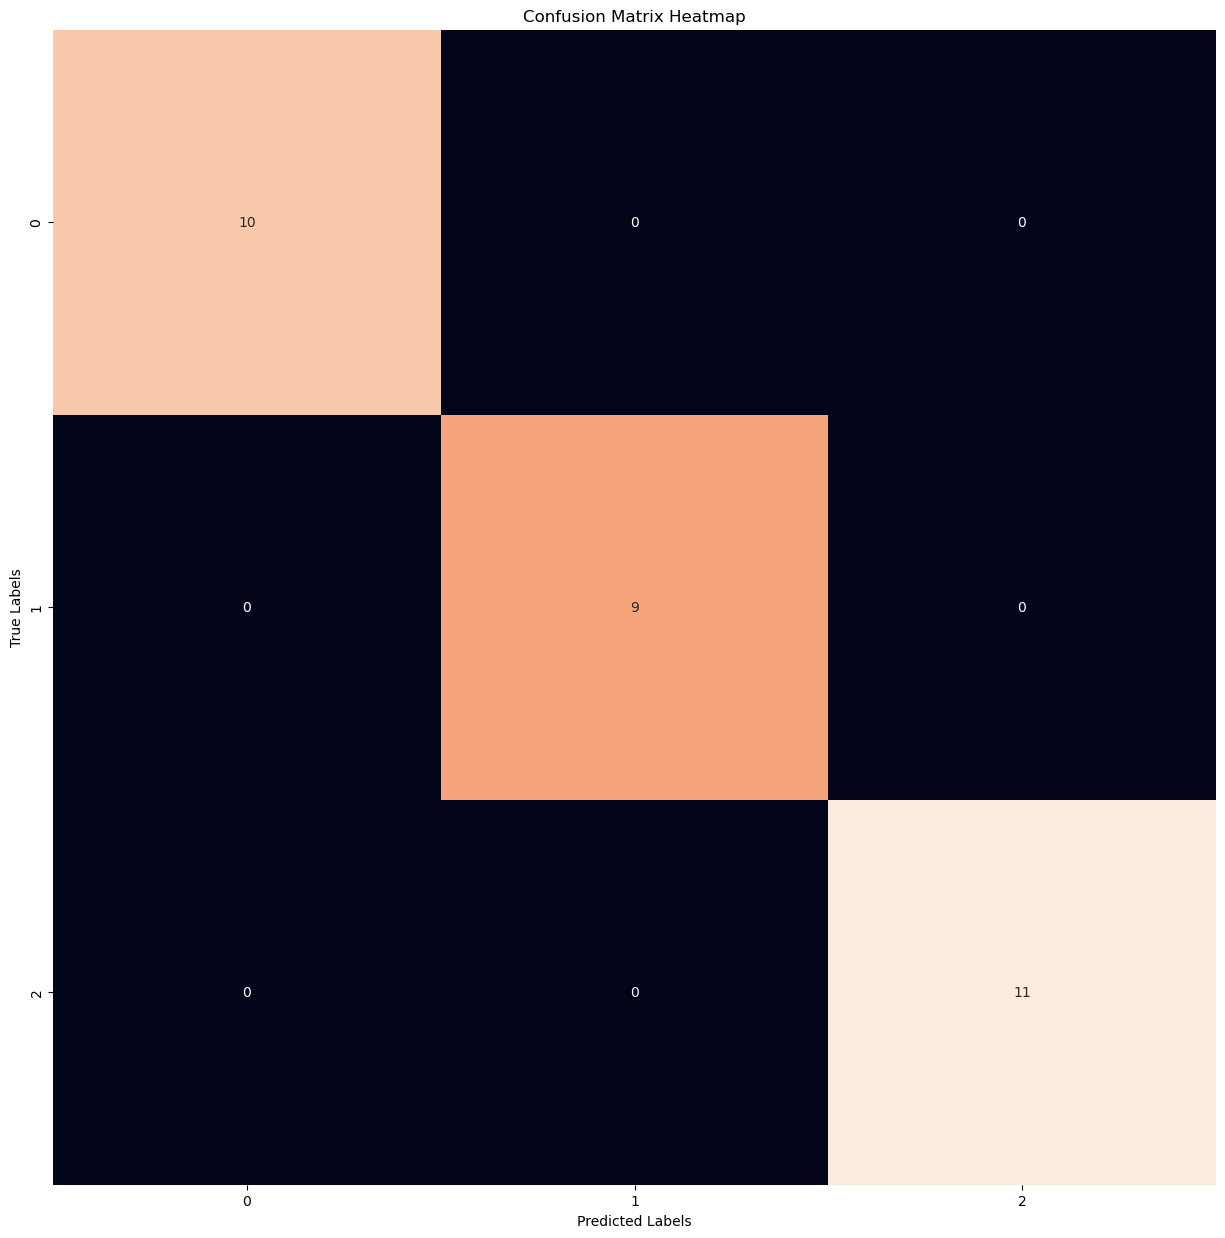

In [49]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Conclusion:
- All models, including Gradient Boosting, Logistic Regression, Linear SVM, and Random Forest, exhibit excellent performance with 100% accuracy on both training and testing datasets. The precision, recall, and F1-score metrics are consistently perfect for all models, suggesting that they successfully classify the Iris flower species.

In this scenario, choosing the "best" model may depend on other considerations such as computational efficiency, interpretability, and ease of use. However, based solely on accuracy and classification metrics, all models seem equally effective. It's important to note that achieving 100% accuracy might also indicate potential overfitting, and further evaluation on larger datasets or with additional validation techniques could provide a more comprehensive assessment.

# Deployment 

In [50]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a random dataset with 10 data points
random_data = {
    'sepal_length': np.random.uniform(4.0, 7.0, 10),
    'sepal_width': np.random.uniform(2.0, 4.5, 10),
    'petal_length': np.random.uniform(1.0, 7.0, 10),
    'petal_width': np.random.uniform(0.1, 2.5, 10)
}

# Create a DataFrame
random_df = pd.DataFrame(random_data)

In [51]:
random_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.123620,2.051461,4.671117,1.558108
1,6.852143,4.424775,1.836963,0.509258
2,6.195982,4.081107,2.752868,0.256124
3,5.795975,2.530848,3.198171,2.377325
4,4.468056,2.454562,3.736420,2.417517
5,4.467984,2.458511,5.711056,2.040154
6,4.174251,2.760606,2.198043,0.831073
7,6.598528,3.311891,4.085407,0.334413
8,5.803345,3.079863,4.554487,1.742159
9,6.124218,2.728073,1.278702,1.156366


In [53]:
# Preprocess the random data using the same transformations
random_transform = transformer.transform(random_df)

## GradientBoostingClassifier

In [55]:
# Make predictions on the preprocessed random data
random_predictions = mnb.predict(random_transform)
random_predictions

array([1, 0, 1, 2, 2, 2, 0, 1, 2, 1])

In [56]:
# Decode the predicted labels back to original species names
predicted_species = label_encoder.inverse_transform(random_predictions)
predicted_species

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [58]:
# Add the predicted species to the random DataFrame
random_df['predicted_species'] = predicted_species

random_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'predicted_species']]

,sepal_length,sepal_width,petal_length,petal_width,predicted_species
0,5.123620,2.051461,4.671117,1.558108,Iris-versicolor
1,6.852143,4.424775,1.836963,0.509258,Iris-setosa
2,6.195982,4.081107,2.752868,0.256124,Iris-versicolor
3,5.795975,2.530848,3.198171,2.377325,Iris-virginica
4,4.468056,2.454562,3.736420,2.417517,Iris-virginica
5,4.467984,2.458511,5.711056,2.040154,Iris-virginica
6,4.174251,2.760606,2.198043,0.831073,Iris-setosa
7,6.598528,3.311891,4.085407,0.334413,Iris-versicolor
8,5.803345,3.079863,4.554487,1.742159,Iris-virginica
9,6.124218,2.728073,1.278702,1.156366,Iris-versicolor


## Logistics Regression

In [60]:
# Make predictions on the preprocessed random data
random_predictions = model.predict(random_transform)
random_predictions

array([2, 0, 0, 2, 2, 2, 0, 1, 1, 1])

In [61]:
# Decode the predicted labels back to original species names
predicted_species = label_encoder.inverse_transform(random_predictions)
predicted_species

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [62]:
# Add the predicted species to the random DataFrame
random_df['predicted_species'] = predicted_species

random_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'predicted_species']]

,sepal_length,sepal_width,petal_length,petal_width,predicted_species
0,5.123620,2.051461,4.671117,1.558108,Iris-virginica
1,6.852143,4.424775,1.836963,0.509258,Iris-setosa
2,6.195982,4.081107,2.752868,0.256124,Iris-setosa
3,5.795975,2.530848,3.198171,2.377325,Iris-virginica
4,4.468056,2.454562,3.736420,2.417517,Iris-virginica
5,4.467984,2.458511,5.711056,2.040154,Iris-virginica
6,4.174251,2.760606,2.198043,0.831073,Iris-setosa
7,6.598528,3.311891,4.085407,0.334413,Iris-versicolor
8,5.803345,3.079863,4.554487,1.742159,Iris-versicolor
9,6.124218,2.728073,1.278702,1.156366,Iris-versicolor
